In [2]:
# Importing Pandas

import pandas as pd

In [90]:
# Reading the Building and Property Violations Dataset

df = pd.read_csv("Building and Property Violations.csv")

In [91]:
# Printing the head of the dataset

df.head()

,case_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,violation_suffix,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,V640594,2022-10-25 14:33:50,Open,105.1,NaN,Failure to Obtain Permit,266,NaN,Princeton,ST,...,01,266 PRINCETON ST,NaN,EAST BOSTON,MA,02128,113277,42.379920,-71.03004,"(42.379920000459, -71.03004000120775)"
1,V640442,2022-10-25 09:10:17,Open,102.8,NaN,Maintenance,98,NaN,Mount Vernon,ST,...,05,98 Mount Vernon St,NaN,Boston,MA,02108,98802,42.357810,-71.06906,"(42.35781000017358, -71.0690600012453)"
2,V640293,2022-10-24 15:41:12,Open,102.8,NaN,Maintenance,96,NaN,Mount Vernon,ST,...,05,96 MOUNT VERNON ST,NaN,BOSTON,MA,02108,98779,42.357810,-71.06896,"(42.35781000018984, -71.0689600011537)"
3,V640286,2022-10-24 15:15:50,Open,105.1,NaN,Failure to Obtain Permit,85,NaN,Como,RD,...,18,85 COMO RD,NaN,HYDE PARK,MA,02136,41543,42.241330,-71.14157,"(42.241329999816, -71.1415700008891)"
4,V640272,2022-10-24 14:47:59,Open,907.8,NaN,Fire Protection Systems,27,NaN,Nay,ST,...,01,94 CONDOR ST,NaN,BOSTON,MA,02128,167991,42.383065,-71.03797,"(42.38306451209138, -71.03797006220091)"


In [92]:
# Printing the shape of the dataset

df.shape

(21471, 23)

In [95]:
# Extracting the rows with violation suffix ST, AVE, and RD (as these are the three most occuring violation suffixes)

df_most = df.loc[df['violation_suffix'].isin(['ST', "AVE", "RD"])]

In [96]:
# Checking to see if these are the only three violation suffixes in the new DataFrame

df_most["violation_suffix"].unique()

array(['ST', 'RD', 'AVE'], dtype=object)

In [106]:
df_most.reset_index(inplace = True)

In [107]:
# Printing the head of the new DataFrame

df_most.head()

,index,case_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,0,V640594,2022-10-25 14:33:50,Open,105.1,NaN,Failure to Obtain Permit,266,NaN,Princeton,...,01,266 PRINCETON ST,NaN,EAST BOSTON,MA,02128,113277,42.379920,-71.03004,"(42.379920000459, -71.03004000120775)"
1,1,V640442,2022-10-25 09:10:17,Open,102.8,NaN,Maintenance,98,NaN,Mount Vernon,...,05,98 Mount Vernon St,NaN,Boston,MA,02108,98802,42.357810,-71.06906,"(42.35781000017358, -71.0690600012453)"
2,2,V640293,2022-10-24 15:41:12,Open,102.8,NaN,Maintenance,96,NaN,Mount Vernon,...,05,96 MOUNT VERNON ST,NaN,BOSTON,MA,02108,98779,42.357810,-71.06896,"(42.35781000018984, -71.0689600011537)"
3,3,V640286,2022-10-24 15:15:50,Open,105.1,NaN,Failure to Obtain Permit,85,NaN,Como,...,18,85 COMO RD,NaN,HYDE PARK,MA,02136,41543,42.241330,-71.14157,"(42.241329999816, -71.1415700008891)"
4,4,V640272,2022-10-24 14:47:59,Open,907.8,NaN,Fire Protection Systems,27,NaN,Nay,...,01,94 CONDOR ST,NaN,BOSTON,MA,02128,167991,42.383065,-71.03797,"(42.38306451209138, -71.03797006220091)"


In [108]:
# Transforming the three labels into numbers 0, 1, and 2

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(df_most_open['violation_suffix'])

label

array([2, 2, 2, ..., 2, 2, 2])

In [109]:
# Initializing the colors list (one color each for each violation suffix)

colors = ['red', 'blue', 'green']

In [110]:
# Plotting the occurence of each violation with its color on Boston city's map and saving the plot

import folium

nyc_map = folium.Map(location = [42.3601, -71.0589], zoom_start = 11)

for i in range(len(df_most)):
    folium.vector_layers.CircleMarker(
        location = [df_most["latitude"][i], df_most["longitude"][i]],
        radius = 5, 
        weight = 2,
        fill = True, 
        fill_color = colors[int(label[i])],
        color = colors[int(label[i])]
    ).add_to(nyc_map)
    
nyc_map.save("index.html")

In [5]:
# Importing the Rentsmart dataset

df = pd.read_csv("Rentsmart.csv")

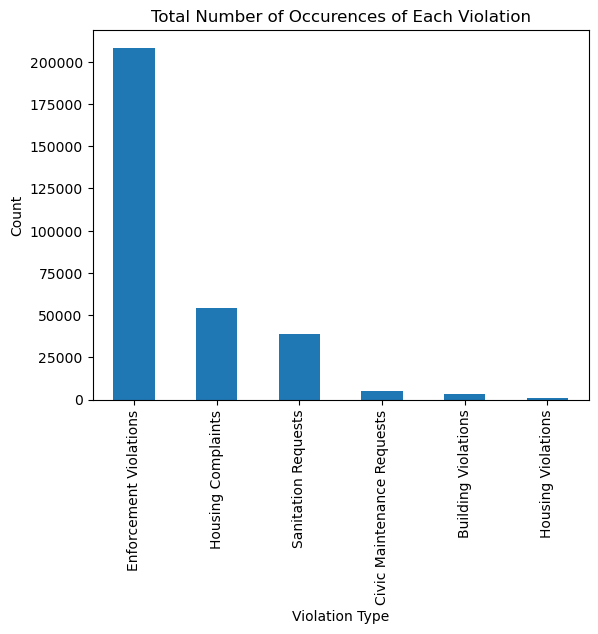

In [7]:
# Plotting the Number of Violations for each type of Violation

import matplotlib.pyplot as plt

#plt.figure(figsize=(18, 15))
df.violation_type.value_counts().plot(kind="bar")
plt.title("Total Number of Occurences of Each Violation")
plt.xlabel("Violation Type")
plt.xticks(rotation=90)
plt.ylabel("Count")
#plt.figure(figsize = (10, 10))
plt.show()

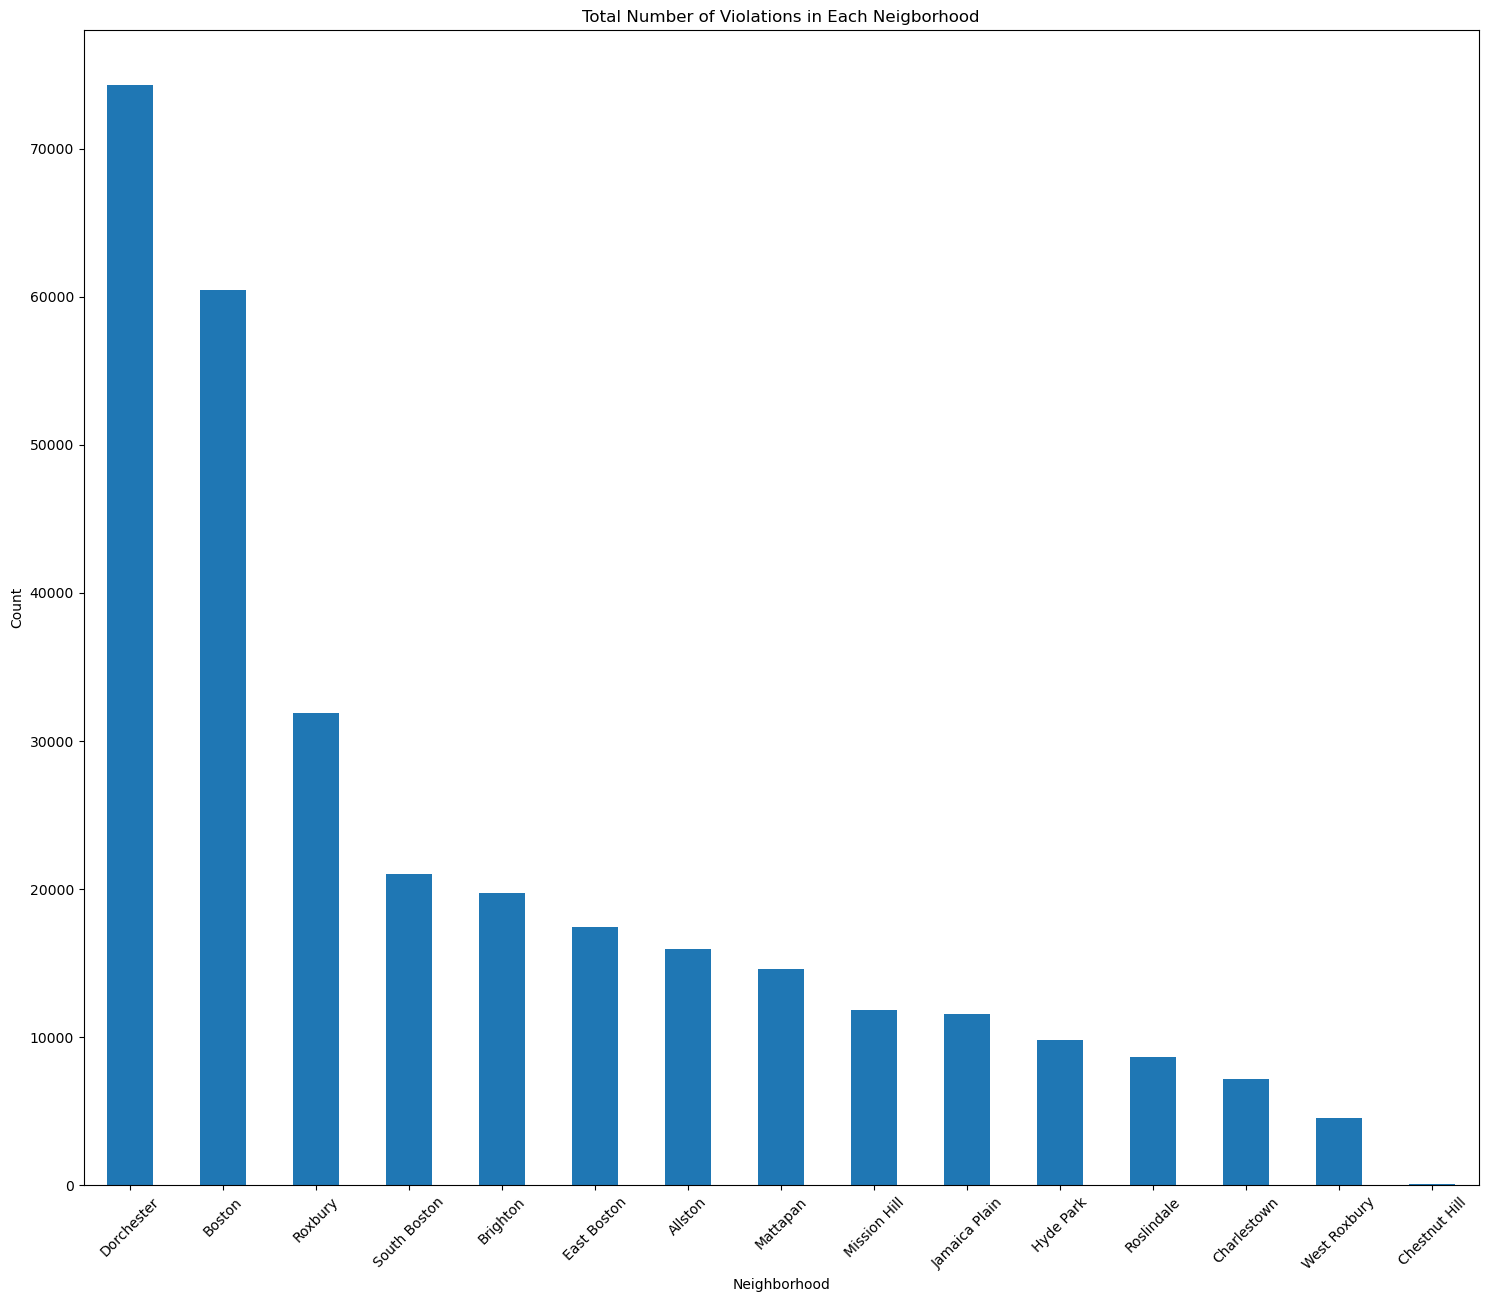

In [29]:
# Plotting the Number of Violations per Neighborhood in Boston City

plt.figure(figsize=(18, 15))
df.neighborhood.value_counts().plot(kind="bar")
plt.title("Total Number of Violations in Each Neigborhood")
plt.xlabel("Neighborhood")
plt.xticks(rotation=45)
plt.ylabel("Count")
#plt.figure(figsize = (10, 10))
plt.show()

In [32]:
# Printing the number of violations for each type of violation

df.violation_type.value_counts()

Enforcement Violations        207180
Housing Complaints             54230
Sanitation Requests            38806
Civic Maintenance Requests      4947
Building Violations             3279
Housing Violations               666
Name: violation_type, dtype: int64

In [25]:
# Extracting all rows with major violations (i.e. Building Violations, Housing Complaints, and Sanitation Requests)

df_maj_viols = df[df['violation_type'].isin(['Building Violations','Housing Complaints', 'Sanitation Requests'])]

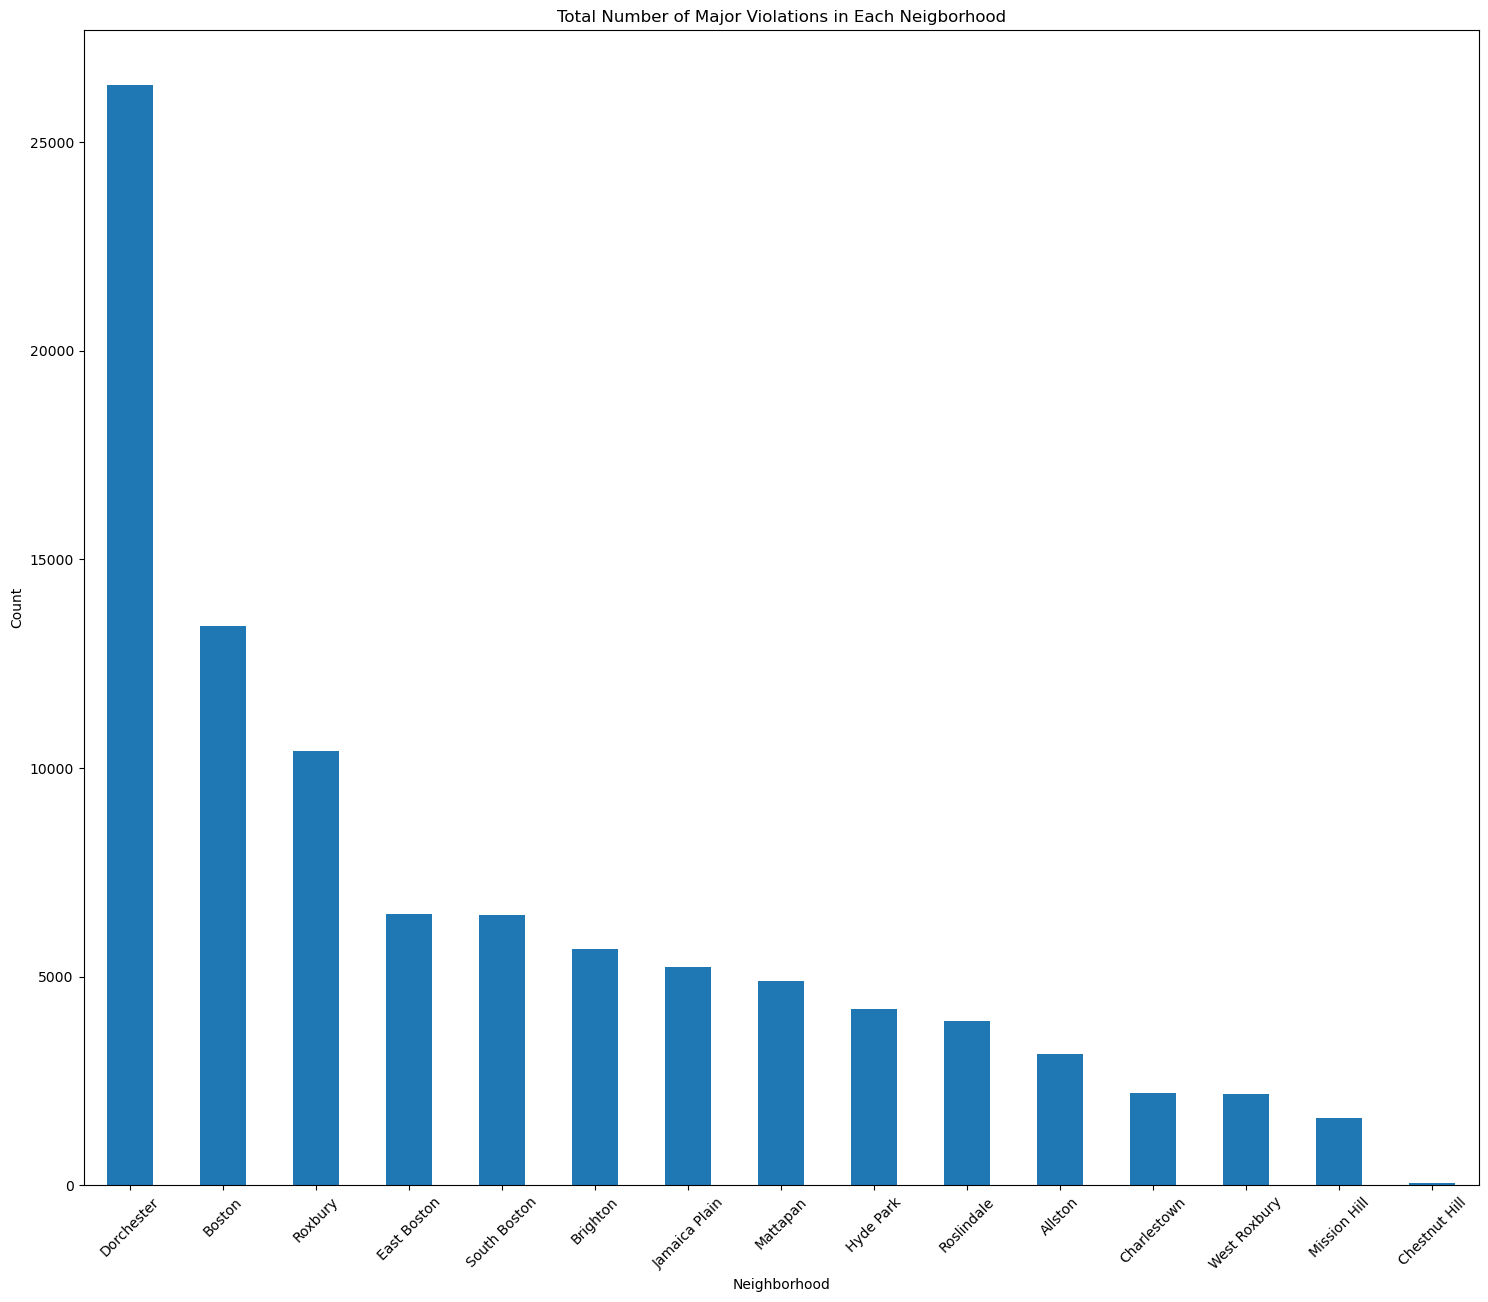

In [27]:
# Plotting the Number of Major Violations per Neighborhood in Boston City

plt.figure(figsize=(18, 15))
df_maj_viols.neighborhood.value_counts().plot(kind="bar")
plt.title("Total Number of Major Violations in Each Neigborhood")
plt.xlabel("Neighborhood")
plt.xticks(rotation=45)
plt.ylabel("Count")
#plt.figure(figsize = (10, 10))
plt.show()